# Data Science Bookcamp

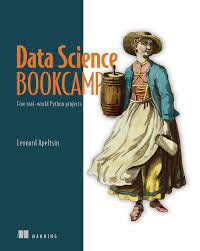

Code for solving case studies from Manning's [Data Science Bookcamp](https://www.manning.com/books/data-science-bookcamp) - book received Nov 11 2021, $39.95 including shipping (from Sep 9 2019 MEAP order).

## Chapter 1 - Computing Probabilities using Python

In [1]:
sample_space = {'Heads', 'Tails'}

In [2]:
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [3]:
# defining event conditions
def is_head_or_tails(outcome):
    return outcome in {'Heads', 'Tails'}

def is_neither(outcome):
    return not is_head_or_tails(outcome)

def is_heads(outcome):
    return outcome == 'Heads'

def is_tails(outcome):
    return outcome == 'Tails'

def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

In [4]:
event_conditions = {is_head_or_tails, is_heads, is_tails, is_neither}
for event_condition in event_conditions:
    print(f"Event condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space)
    print(f"Event: {event}\n")

Event condition: is_tails
Event: {'Tails'}

Event condition: is_head_or_tails
Event: {'Tails', 'Heads'}

Event condition: is_neither
Event: set()

Event condition: is_heads
Event: {'Heads'}



In [5]:
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event)/len(generic_sample_space)

In [6]:
for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_neither' is 0.0
Probability of event arising from 'is_heads' is 0.5


Using a biased coin - assuming heads is 4 times more probable than tails is.

In [7]:
weighted_sample_space = {'Heads' : 4, 'Tails':1}

In [8]:
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

In [9]:
event = get_matching_event(is_head_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [10]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event)/len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size /sum(generic_sample_space.values())
    

In [11]:
print("==== Using a biased coin ====")
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

==== Using a biased coin ====
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_head_or_tails' is 1.0
Probability of event arising from 'is_neither' is 0.0
Probability of event arising from 'is_heads' is 0.8


## Computing non-trivial probabilities

Analyzing a family with four children - what is the probability that *exactly* two of the children are boys?

In [12]:
from itertools import product
possible_children = ['Boy','Girl']
sample_space = set()
# silly approach - nested loops
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1,child2,child3,child4)
                sample_space.add(outcome)
# more efficient approach - use standard library                
all_combinations = product(*(4*[possible_children]))
assert set(all_combinations) == sample_space
# best approach
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space_efficient == sample_space

In [13]:
def has_two_boys(outcome):
    return len([child for child in outcome if child == 'Boy']) == 2

In [14]:
prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of exactly two boys of four children = {prob}")

Probability of exactly two boys of four children = 0.375


## Multiple die rolls

In [15]:
possible_rolls = list(range(1,7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


Six consecutive rolls of a die totalling 21

In [16]:
sample_space = set(product(possible_rolls, repeat=6))
def has_sum_21(outcome):
    return sum(outcome) == 21

prob = compute_event_probability(has_sum_21, sample_space)
print(f"Six rolls sum to 21 with a probability of {prob}")

Six rolls sum to 21 with a probability of 0.09284979423868313


The same calculcation using a simple lambda expression:

In [17]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_21, sample_space)

Using a weighted sample space, to reduce the number of individual events to store:

In [18]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1 

In [19]:
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

In [20]:
num_combination = weighted_sample_space[21]
print(f"There are {num_combination} ways for 6 die rolls to sum to 21")

There are 4332 ways for 6 die rolls to sum to 21


In [21]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
print(f"The probability of 6 die rolls to sum to 21 is {prob}")

The probability of 6 die rolls to sum to 21 is 0.09284979423868313


In [22]:
print(f"Number of elements in sample_space: {len(sample_space)}")
print(f"Number of elements in weighted_sample_space: {len(weighted_sample_space)}")

Number of elements in sample_space: 46656
Number of elements in weighted_sample_space: 31


### Interval ranges

In [23]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

In [24]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


In [25]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

In [26]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f"Probability of observing more than seven heads is {prob}")

Probability of observing more than seven heads is 0.0546875


In [27]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space)
print(f"Probability of observing more than seven heads or tails is {prob}")

Probability of observing more than seven heads or tails is 0.109375


In [28]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15), weighted_sample_space_20_flips)
print(f"Probability of observing more than fifteen heads or tails is {prob}")

Probability of observing more than fifteen heads or tails is 0.01181793212890625


# Chapter 2 - Matplotlib

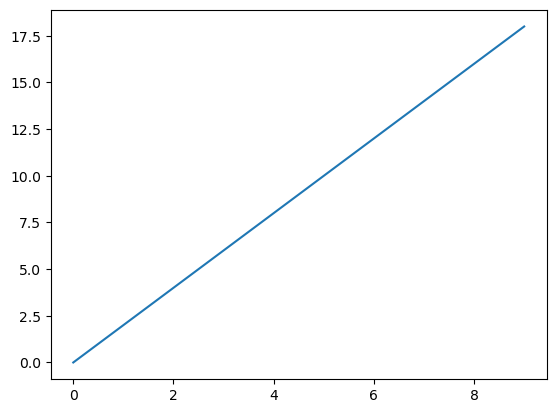

In [29]:
import matplotlib.pyplot as plt
x = range(10)
y = [2*value for value in x]
plt.plot(x,y)
plt.show()  # crucial step to actually also display the stuff plotted ...

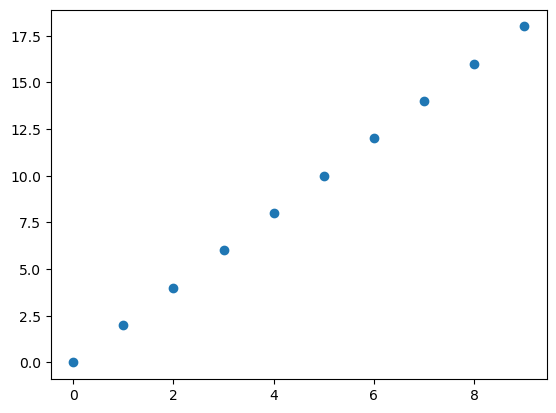

In [30]:
plt.scatter(x,y)
plt.show()

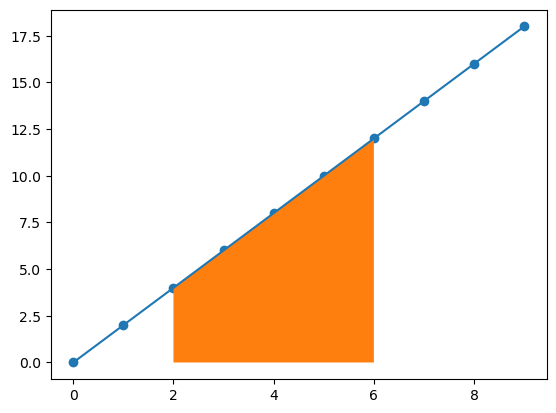

In [31]:
plt.plot(x,y)
plt.scatter(x,y)
where = [is_in_interval(v, 2, 6) for v in x]
plt.fill_between(x,y,where=where)
plt.show()

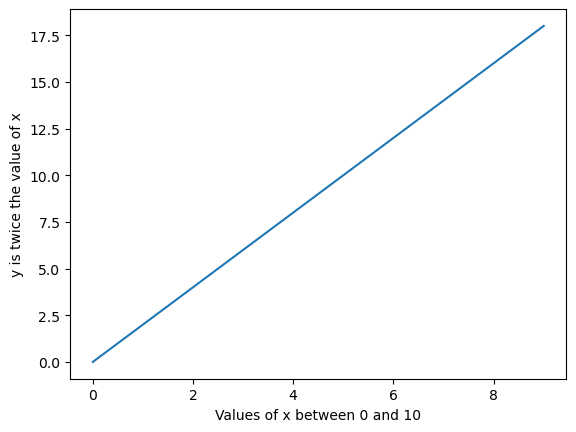

In [32]:
plt.plot(x,y)
plt.xlabel("Values of x between 0 and 10")
plt.ylabel("y is twice the value of x")
plt.show()

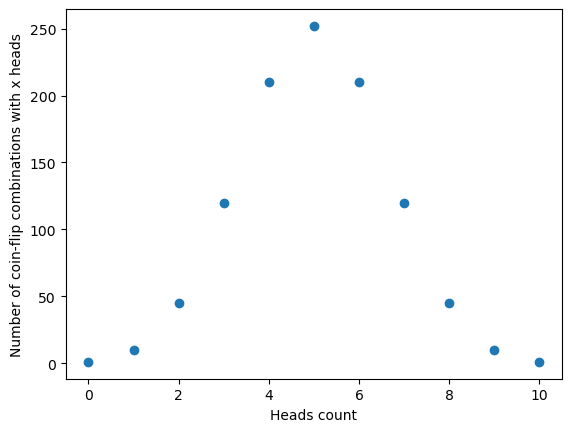

In [33]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Heads count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

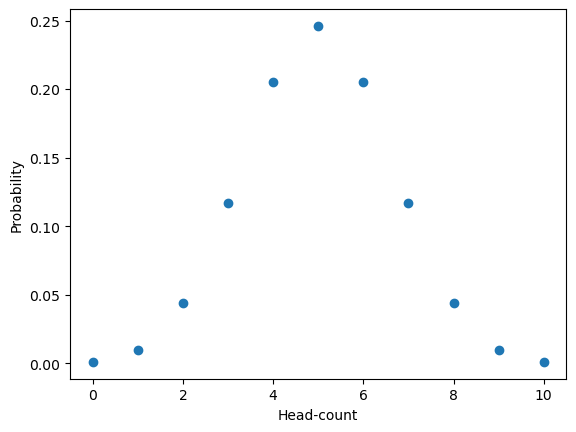

In [34]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [35]:
assert sum(prob_x_10_flips) == 1.0

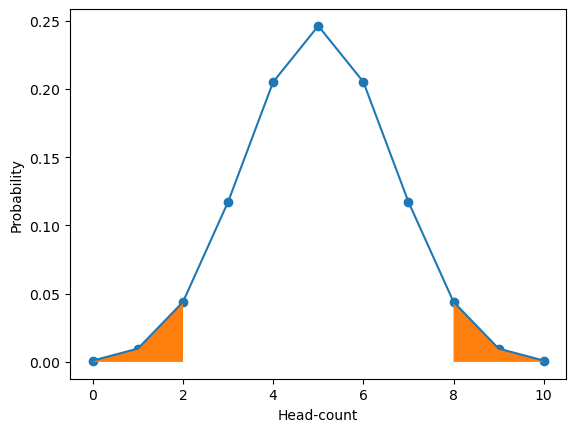

In [36]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

In [37]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[k] for k in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

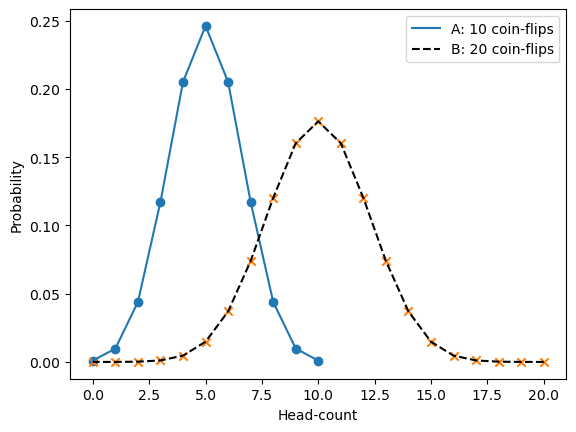

In [38]:
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10 coin-flips")
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, label="B: 20 coin-flips", color='black', linestyle='--')
plt.scatter(x_20_flips, prob_x_20_flips,marker='x')
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.legend()  # required to show the actual labels!
plt.show()

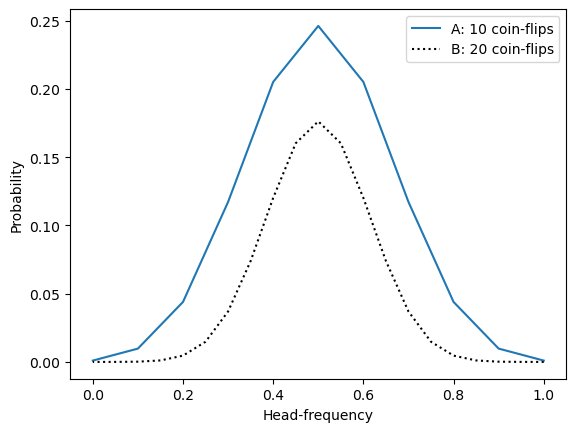

In [39]:
x_10_frequencies = [head_count/10 for head_count in x_10_flips]
x_20_frequencies = [head_count/20 for head_count in x_20_flips]
plt.plot(x_10_frequencies, prob_x_10_flips, label="A: 10 coin-flips")
plt.plot(x_20_frequencies, prob_x_20_flips, color="k", linestyle=":", label="B: 20 coin-flips")
plt.legend()
plt.xlabel("Head-frequency")
plt.ylabel("Probability")
plt.show()

                    

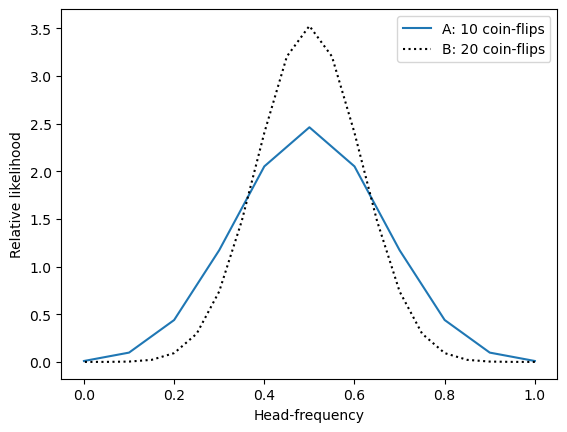

In [40]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]
plt.plot(x_10_frequencies, relative_likelihood_10, label="A: 10 coin-flips")
plt.plot(x_20_frequencies, relative_likelihood_20, color='k', linestyle=":", label="B: 20 coin-flips")
plt.legend()
plt.xlabel("Head-frequency")
plt.ylabel("Relative likelihood")
plt.show()


# Chapter 3 Running random simulations in NumPy

NumPy is an optimized native-code numerical library to perform numerical calculations and analyses in Python.

In [41]:
import numpy as np
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

In [42]:
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5,6,1]

In [43]:
np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip else 'tails'}")

Coin landed on tails


In [44]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0,2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequence of Heads is {freq_heads}")

Frequence of Heads is 0.8


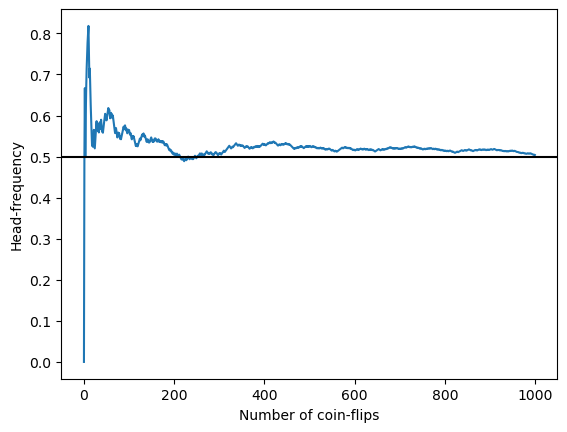

In [45]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of coin-flips')
plt.ylabel('Head-frequency')
plt.show()

         

## Biased coin flips

In [46]:
np.random.seed(0)
print("Flip a coin once")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip else 'tails'}")

print("\nFlip a coin ten times")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print(f"{head_count} heads were obtained out of {number_coin_flips} biased coin flips")


Flip a coin once
Biased coin landed on heads

Flip a coin ten times
6 heads were obtained out of 10 biased coin flips


Will this converge to 0.7 eventually?

In [47]:
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of heads is {frequency}")

Frequency of heads is 0.697


In [48]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7)/1000 == 0.697
for i in range(1,6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Observed frequency equals expected probability!")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Observed frequency equals expected probability!
Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


In [49]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

It is more efficient to use NumPy's datastructures and optimizations than it is to use loops in Python (prefixing the command with %timeit shows that the numpy implementation is at least at factor 10 times faster)

In [50]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [51]:
assert head_count_array.tolist() == head_count_list

In [52]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array)

In [53]:
# can execute scalar operations against every element of a NumPy array easily
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count/1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x/1000, head_count_list))

In [54]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [55]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq-min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


Simple plot attempt for the frequency and its number of occurrences:

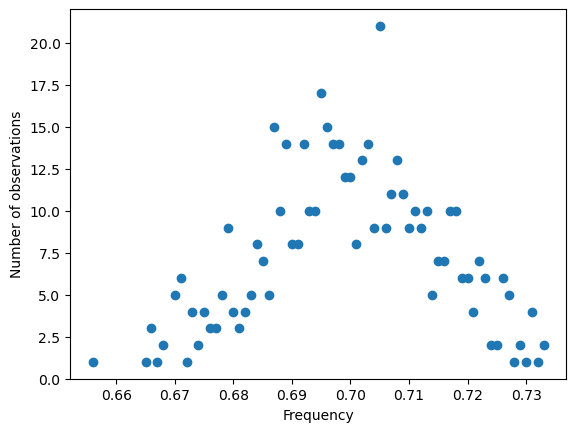

In [56]:
frequency_counts = defaultdict(int)
for x in frequency_array:
    frequency_counts[x] += 1 

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[fv] for fv in frequency_counts]
plt.scatter(frequencies, counts)
plt.xlabel("Frequency")
plt.ylabel("Number of observations")
plt.show()

Using matplotlib's histogram is way easier ... and this simply supports NumPy arrays as well!

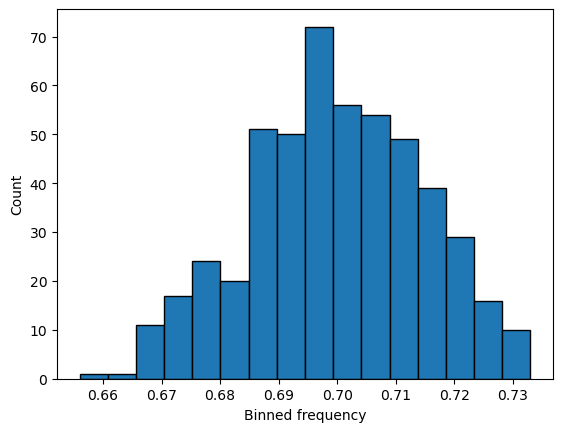

Yo bro, we have just plotted 16 bins of bin width 0.004812499999999997
The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [57]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains"
           f" {count} element{'' if count == 1 else 's'}"))

plt.xlabel('Binned frequency')
plt.ylabel('Count')
plt.show()
bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Yo bro, we have just plotted {counts.size} bins of bin width {bin_width}")
output_bin_coverage(0)
output_bin_coverage(5)
assert counts[counts.argmax()] == counts.max()




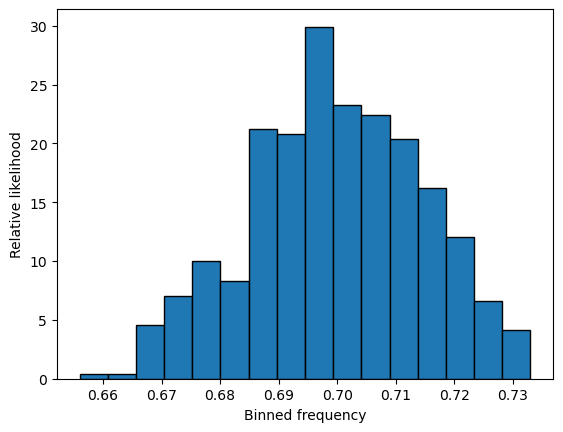

In [58]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned frequency')
plt.ylabel('Relative likelihood')
plt.show()

In [59]:
# the area beneath the histogram should still be 1.0
assert likelihoods.sum() * bin_width == 1.0

In [60]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [61]:
peak_index = likelihoods.argmax()
start_index, end_index = peak_index - 1, peak_index + 2
area = likelihoods[start_index:end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


How can we achieve a 95+ % confidence interval? By expanding the range of bins we consider!

In [75]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        area = likelihoods[start_index:end_index+1].sum()*bin_width
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print(f"The frequency range {range_string} represents a {100*area:.2f}% confidence interval")
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


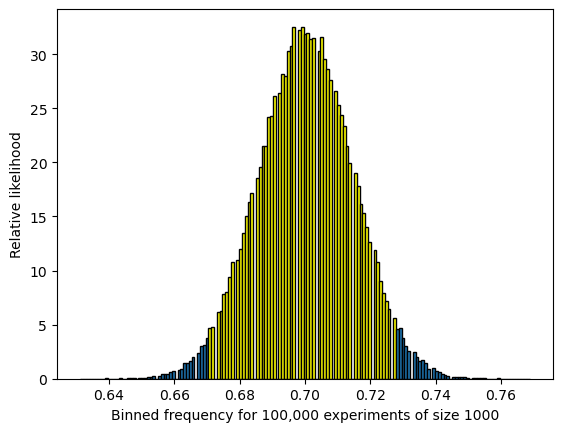

In [76]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array/1000
assert frequency_array.size == 100000
likelihoods, bin_edges, patches = plt.hist(frequency_array,bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned frequency for 100,000 experiments of size 1000')
plt.ylabel('Relative likelihood')
plt.show()

This does not significantly alter the frequency range for the same confidence interval ... how about increasing the SIZE of each experiment

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


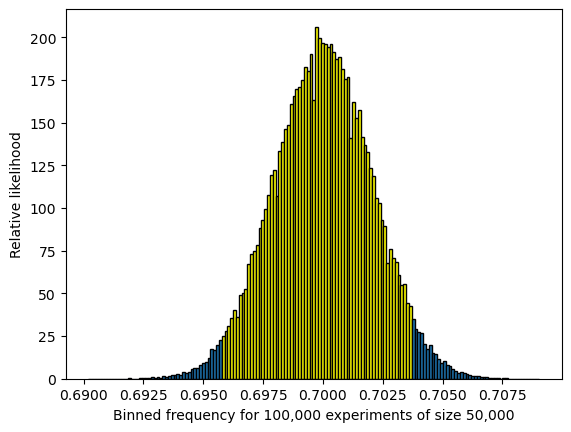

In [79]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array/50000

likelihoods, bin_edges, patches = plt.hist(frequency_array,bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned frequency for 100,000 experiments of size 50,000')
plt.ylabel('Relative likelihood')
plt.show()

NumPy also exposes this functionality without requiring us to plot an actual histogram, using np.histogram:

In [82]:
likelihoods, bin_edges = np.histogram(frequency_array,bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


### Biased deck of cards

Let's suppose we have a biased deck of cards, cards are either red or black but the card counts are not equal. We're allowed to see the top card, but not the other ones. We need to reshuffle the cards after viewing the top card and are allowed to see the top card again. How many read cards are present?